# STEP1 : Problem Identification

## Genetic Disorder Prediction:

As per reports, because of the unsustainable increase in population and a lack of access to adequate health care, food, and shelter, the number of genetic disorder ailments have increased. 
Hereditary illnesses are becoming more common due to a lack of understanding about the need for genetic testing. 
Often kids die because of these illnesses, thus genetic testing during pregnancy is critical.


## Context

•	Since the dawn of human life on the face of the earth, the global population has been booming. The population was estimated to be 1 billion people in the year 1800. The figure had increased to a new high of 6 billion humans by the turn of the twentieth century. Day in and day out, 227,000 people are being added to the world; it is projected that by the end of the 21st century, the world's population may exceed 11 billion.

•	As per reports, because of the unsustainable increase in population and a lack of access to adequate health care, food, and shelter, the number of genetic disorder ailments have increased. Hereditary illnesses are becoming more common due to a lack of understanding about the need for genetic testing. Often kids die because of these illnesses, thus genetic testing during pregnancy is critical.


## Column Definitions:

•	Genes in mother's side:
Represent a gene defect in a patient's mother

•	Inherited from father:
Represent a gene defect in a patient's father

•	Paternal gene:
Represent a gene defect in a patient's paternal side of the family

•	Respiratory Rate(breaths/min):
Represents a patient's respiratory breathing rate

•	Heart Rate (rates/min):
Represents a patient's heart rate

•	Parental Consent:
Represents whether a patient's parents approved the treatment plan

•	Follow-up:
Represents a patient's level of risk (how intense their condition is)

•	Folic acid details (peri-conceptional):
Represents the periconceptional folic acid supplementation details of a patient

•	H/O serious maternal illness:
Represents an unexpected outcome of labor and delivery that resulted in significant short or long term consequences to a patient's mother

•	H/O radiation exposure (x-ray):
Represents whether a patient has any radiation exposure history

•	H/O substance abuse:
Represents whether a parent has a history of drug addiction

•	Assisted conception:
Represents the type of treatment used for infertility

•	Birth defects:
Represents whether a patient has birth defects


TARGET
•	Genetic Disorder
•	Disorder Subclass

We will only focus on Genetic Disorder variable in this study.


# STEP2 : Data Wrangling

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
file = '../data/train.csv'
df = pd.read_csv(file)
print(df.head(2))

  Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre  ...            NaN   
1         NaN        Brycen  ...       Multiple   

   White Blood cell count (thousand per microliter) Blood test result  \
0                                          9.857562               NaN   
1                                          5.522560            normal   

  Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  \
0       1.0       1.0       1.0       1.0        1.0   
1       1.0       NaN       1.0       1.0        0.0   

     

In [147]:
print(df.shape)

(22083, 45)


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [149]:
df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

We will drop the columns that are not very useful for our prediction

In [150]:
df.drop(columns=["Patient Id","Patient First Name","Family Name","Father's name","Institute Name","Location of Institute", 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5','Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'], inplace=True, axis=1)

In [151]:
df.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

Check Unique values for each column to find out if there are values which represent nan or incorrect values. 
e.g values like "-" will be replaced with nan for data uniformity

In [152]:
for col in df:
    print(col,":", df[col].unique())

Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]
Genes in mother's side : ['Yes' 'No']
Inherited from father : ['No' 'Yes' nan]
Maternal gene : ['Yes' 'No' nan]
Paternal gene : ['No' 'Yes']
Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
Mother's age : [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
Father's age : [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 37. 36. 33. 46. 40. 45.]
Status : ['Alive' 'Deceased']
Respiratory Rate (breaths/min) : ['Normal (30-60)' 'Tachypnea' nan]
Heart Rate (rates/min : ['Normal' 'Tachycardia' nan]
Parental consent : ['Yes' nan]
Follow-up : ['High' 'Low' nan]
Gender : [nan 'Male' 'Female' 'Ambiguous']
Birth asphyxia : [nan 'No' 'No record' 'Not available' 'Yes']
Aut

In [153]:
df['Autopsy shows birth defect (if applicable)'].value_counts()

Not applicable    11083
Yes                3383
None               3366
No                 3225
Name: Autopsy shows birth defect (if applicable), dtype: int64

As we see columns like 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'H/O radiation exposure (x-ray)''H/O substance abuse' has values like 'Not applicable', 'None', '-', 'No Record' which can be replaced with Nan.

In [154]:
#df.isna().sum()
df['Birth asphyxia'] = df['Birth asphyxia'].replace("Not available", np.NaN)
df['Birth asphyxia'] = df['Birth asphyxia'].replace("No record", np.NaN)
df['Autopsy shows birth defect (if applicable)'] = df['Autopsy shows birth defect (if applicable)'].replace("Not applicable", np.NaN)
df['Gender'] = df['Gender'].replace("Ambiguous", np.NaN)
#check with dipanjan on this : yes we can replcae None with no
df['Autopsy shows birth defect (if applicable)'] = df['Autopsy shows birth defect (if applicable)'].replace("None", 'No')
df['H/O radiation exposure (x-ray)'] = df['H/O radiation exposure (x-ray)'].replace("Not applicable", np.NaN)
df['H/O radiation exposure (x-ray)'] = df['H/O radiation exposure (x-ray)'].replace("-", np.NaN)
df['H/O substance abuse'] = df['H/O substance abuse'].replace("Not applicable", np.NaN)
df['H/O substance abuse'] = df['H/O substance abuse'].replace("-", np.NaN)

In [155]:
for col in df:
    print(col,":", df[col].unique())

Patient Age : [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]
Genes in mother's side : ['Yes' 'No']
Inherited from father : ['No' 'Yes' nan]
Maternal gene : ['Yes' 'No' nan]
Paternal gene : ['No' 'Yes']
Blood cell count (mcL) : [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
Mother's age : [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
Father's age : [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 37. 36. 33. 46. 40. 45.]
Status : ['Alive' 'Deceased']
Respiratory Rate (breaths/min) : ['Normal (30-60)' 'Tachypnea' nan]
Heart Rate (rates/min : ['Normal' 'Tachycardia' nan]
Parental consent : ['Yes' nan]
Follow-up : ['High' 'Low' nan]
Gender : [nan 'Male' 'Female']
Birth asphyxia : [nan 'No' 'Yes']
Autopsy shows birth defect (if applicable) 

Rename Columns for siplicity

In [156]:
df.rename(columns={"Patient Age":"Patient_Age",
                   "Inherited from father" : "Inherited_Father",
                    "Maternal gene" : "Maternal_Gene",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_count_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Parental consent":"Parental_Consent",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Birth_Place",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"Anomalies_History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"WBC_Count",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass"},inplace=True)

In [157]:
df.head()

Patient_Age Genes_Mother_Side Inherited_Father Maternal_Gene Paternal_Gene  \
0          2.0               Yes               No           Yes            No   
1          4.0               Yes              Yes            No            No   
2          6.0               Yes               No            No            No   
3         12.0               Yes               No           Yes            No   
4         11.0               Yes               No           NaN           Yes   

   Blood_Cell_count_mcL  Mother_Age  Father_Age    Status  \
0              4.760603         NaN         NaN     Alive   
1              4.910669         NaN        23.0  Deceased   
2              4.893297        41.0        22.0     Alive   
3              4.705280        21.0         NaN  Deceased   
4              4.720703        32.0         NaN     Alive   

  Respiratory_Rate_Breaths_Min  ... Radiation_Exposure Substance_Abuse  \
0               Normal (30-60)  ...                 No              No   
1                    Tachypnea  ...                NaN             NaN   
2               Normal (30-60)  ...                Yes             NaN   
3                    Tachypnea  ...                NaN             NaN   
4                    Tachypnea  ...                NaN             NaN   

  Assisted_Conception Anomalies_History_Previous_Pregnancies  \
0                  No                                    Yes   
1                  No                                    Yes   
2                 Yes                                    Yes   
3                 NaN                                    Yes   
4                 Yes                                     No   

  Previous_Abortion Birth_Defects WBC_Count Blood_Test_Result  \
0               NaN           NaN  9.857562               NaN   
1               NaN      Multiple  5.522560            normal   
2               4.0      Singular       NaN            normal   
3               1.0      Singular  7.919321      inconclusive   
4               4.0      Multiple  4.098210               NaN   

                               Genetic_Disorder  \
0   Mitochondrial genetic inheritance disorders   
1                                           NaN   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   

                     Disorder_Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  

[5 rows x 29 columns]

In [158]:
df.shape

(22083, 29)

Let's identify How many NA values we have.

In [159]:
df.isnull().values.any()

True

In [160]:
df.isna().sum()

Patient_Age                                1427
Genes_Mother_Side                             0
Inherited_Father                            306
Maternal_Gene                              2810
Paternal_Gene                                 0
Blood_Cell_count_mcL                          0
Mother_Age                                 6036
Father_Age                                 5986
Status                                        0
Respiratory_Rate_Breaths_Min               2149
Heart_Rates_Min                            2113
Parental_Consent                           2125
Follow_Up                                  2166
Gender                                     8868
Birth_Asphyxia                            12133
Autopsy_Birth_Defect                      12109
Birth_Place                                2124
Folic_Acid                                 2117
Maternal_Illness                           2152
Radiation_Exposure                        12098
Substance_Abuse                         

1. As seen above, df has may records with null data for Birth_Asphyxia(12133), Autopsy_Birth_Defect(12109), Radiation_Exposure(12098), Substance_Abuse(12075) and other columns 

- We will fill missing values with 'missing' for string columns 
- We will fill missing values with mean value for numeric columns

2. The Target variables Genetic_Disorder, Disorder_Subclass, have many rows with null values. We will drop these as they are of not any use.

Replacing Nan values with appropriate values

In [161]:
# Replacing Numerical column Values having Nulls
df["Patient_Age"].fillna(round(df["Patient_Age"].mean(), 2),inplace=True)
df["Mother_Age"].fillna(round(df["Mother_Age"].mean(), 2),inplace=True)
df["Father_Age"].fillna(round(df["Father_Age"].mean(), 2),inplace=True)
df["Previous_Abortion"].fillna(round(df["Previous_Abortion"].mean(), 2),inplace=True)
df["WBC_Count"].fillna(round(df["WBC_Count"].mean(), 2),inplace=True)

# Replacing Categorical columns values having Nulls
df["Inherited_Father"].fillna(str('missing'),inplace=True)
df["Maternal_Gene"].fillna(str('missing'),inplace=True)
df["Respiratory_Rate_Breaths_Min"].fillna(str('missing'),inplace=True)
df["Heart_Rates_Min"].fillna(str('missing'),inplace=True)
df["Parental_Consent"].fillna(str('missing'),inplace=True)
df["Follow_Up"].fillna(str('missing'),inplace=True)
df["Gender"].fillna(str('missing'),inplace=True)
df["Birth_Asphyxia"].fillna(str('missing'),inplace=True)
df["Autopsy_Birth_Defect"].fillna(str('missing'),inplace=True)
df["Birth_Place"].fillna(str('missing'),inplace=True)
df["Folic_Acid"].fillna(str('missing'),inplace=True)
df["Maternal_Illness"].fillna(str('missing'),inplace=True)
df["Radiation_Exposure"].fillna(str('missing'),inplace=True)
df["Substance_Abuse"].fillna(str('missing'),inplace=True)
df["Assisted_Conception"].fillna(str('missing'),inplace=True)
df["Anomalies_History_Previous_Pregnancies"].fillna(str('missing'),inplace=True)
df["Birth_Defects"].fillna(str('missing'),inplace=True)
df["Blood_Test_Result"].fillna(str('missing'),inplace=True)

In [162]:
df.dropna(inplace=True)

In [163]:
df.isna().sum()

Patient_Age                               0
Genes_Mother_Side                         0
Inherited_Father                          0
Maternal_Gene                             0
Paternal_Gene                             0
Blood_Cell_count_mcL                      0
Mother_Age                                0
Father_Age                                0
Status                                    0
Respiratory_Rate_Breaths_Min              0
Heart_Rates_Min                           0
Parental_Consent                          0
Follow_Up                                 0
Gender                                    0
Birth_Asphyxia                            0
Autopsy_Birth_Defect                      0
Birth_Place                               0
Folic_Acid                                0
Maternal_Illness                          0
Radiation_Exposure                        0
Substance_Abuse                           0
Assisted_Conception                       0
Anomalies_History_Previous_Pregn

In [164]:
#df.drop(columns=['Disorder_Subclass'], inplace=True, axis=1)

In [165]:
# old shape (22083, 29)
df.shape

(18047, 29)

In [166]:
for c in df.columns:
    print (df[c].value_counts())
    print('----------------------------------')

4.00     1170
5.00     1168
9.00     1166
12.00    1156
2.00     1152
0.00     1152
3.00     1140
7.00     1133
6.00     1127
13.00    1125
1.00     1124
8.00     1109
14.00    1094
11.00    1089
10.00    1082
6.97     1060
Name: Patient_Age, dtype: int64
----------------------------------
Yes    10743
No      7304
Name: Genes_Mother_Side, dtype: int64
----------------------------------
No         10773
Yes         7054
missing      220
Name: Inherited_Father, dtype: int64
----------------------------------
Yes        8803
No         7173
missing    2071
Name: Maternal_Gene, dtype: int64
----------------------------------
No     10239
Yes     7808
Name: Paternal_Gene, dtype: int64
----------------------------------
4.760603    1
5.006081    1
5.014455    1
4.751267    1
4.506074    1
           ..
4.523190    1
4.693834    1
5.208621    1
4.838423    1
4.738067    1
Name: Blood_Cell_count_mcL, Length: 18047, dtype: int64
----------------------------------
34.53    4457
23.00     449
48

Checking if any rows are duplicated. if yes, then we need to drop them.

In [167]:
df_dup = df.duplicated()
print(df_dup.sum())

0


# STEP3 : EDA-Exploratory Data Analysis

There are many types of genetic diseases. Four of the main types are:
1.	Single-gene inheritance diseases:
Single gene inheritance diseases are diseases that occur because one defective gene is present. They are known as monogenetic disorders. 
Examples of single gene inheritance disorders include:
•	Cystic fibrosis
•	Sickle-cell anemia
•	Polycystic kidney disease types 1 and 2
•	Tay-Sachs disease etc.

2.	Multifactorial genetic inheritance disorders:
Multifactorial conditions tend to run in families. This is because they are partly caused by genes. Your risk for a multifactorial trait or condition depends on how close you are to a family member with the trait or condition.
Types Of Multifactorial Traits and Disorders
Health problems that are caused by both genes and other factors include:
•	Birth defects such as neural tube defects and cleft palate
•	Cancers of the breast, ovaries, bowel, prostate, and skin
•	High blood pressure and high cholesterol
•	Diabetes
•	Alzheimer disease
•	Schizophrenia
•	Bipolar disorder
•	Arthritis
•	Osteoporosis
•	Skin conditions such as psoriasis, moles, and eczema
•	Asthma and allergies
•	Multiple sclerosis and other autoimmune disorders

3.	Chromosome abnormalities:
Chromosome abnormalities usually result from a problem with cell division and arise because of duplications or absences of entire chromosomes or pieces of chromosomes. 
Examples of chromosome abnormality disorders include:
•	Down syndrome
•	Cri-du-chat syndrome
•	Klinefelter syndrome
•	Patau syndrome (trisomy 13)
•	Edwards syndrome (trisomy 18)
•	Turner syndrome
•	22q11.2 deletion syndrome
•	Ring chromosome 14 syndrome
•	Prader-Willi syndrome

4.	Mitochondrial genetic inheritance disorders:
Mitochondrial genetic inheritance disorders are caused by mutations in the DNA of mitochondria, small particles within cells. This DNA is unique in that it is not located on the chromosomes in the cell nucleus. Mitochondrial DNA is always inherited from the female parent since egg cells (unlike sperm cells) keep their mitochondrial DNA during the process of fertilization. 
Examples of mitochondrial genetic inheritance disorders include:
•	Hereditary optic atrophy
•	Barth syndrome
•	Co-enzyme Q10 deficiency
•	Myoclonic epilepsy with ragged red fibers (MERRF)
•	MELAS syndrome, a rare form of dementia
•	Kearns-Sayre syndrome
•	Pearson syndrome
•	Neuropathy, ataxia, retinitis pigmentosa (NARP)
•	Leigh’s disease


This dataset contains data for 3 disorders:
Mitochondrial genetic inheritance disorders, Single-gene inheritance diseases, Multifactorial genetic inheritance disorders 

Visualizing categorical data

In [168]:
#select categorical variables only
df["Genetic_Disorder"].value_counts()

Mitochondrial genetic inheritance disorders     9241
Single-gene inheritance diseases                6929
Multifactorial genetic inheritance disorders    1877
Name: Genetic_Disorder, dtype: int64

Our target variable is Categorical string field. Lets plot to check the relationship with other variables. 

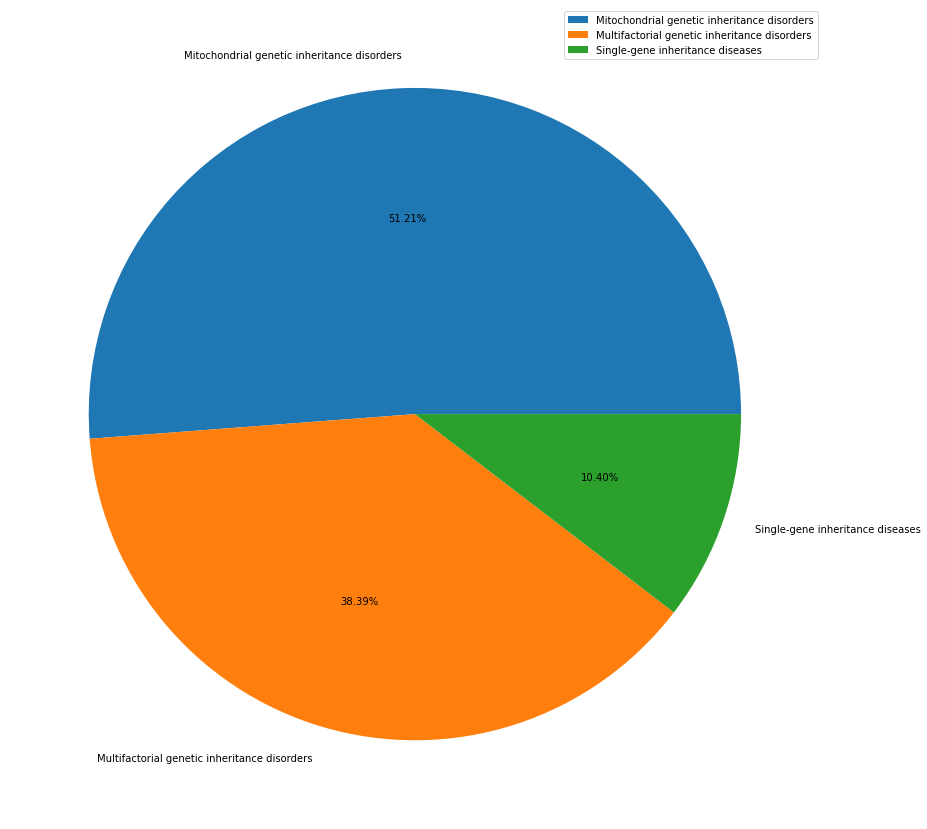

In [174]:
GD_labels = df['Genetic_Disorder'].unique()
GD_values = df['Genetic_Disorder'].value_counts()
plt.figure(figsize=(15,15))
#df['Genetic_Disorder'].value_counts().plot(kind='pie')
plt.pie(GD_values, labels=GD_labels, autopct='%1.2f%%')
plt.legend(loc = 'upper right')

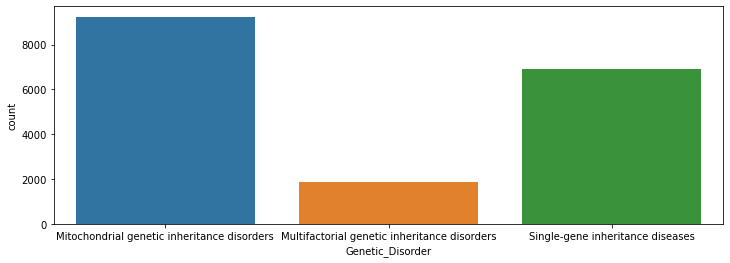

In [170]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'Genetic_Disorder', data = df);

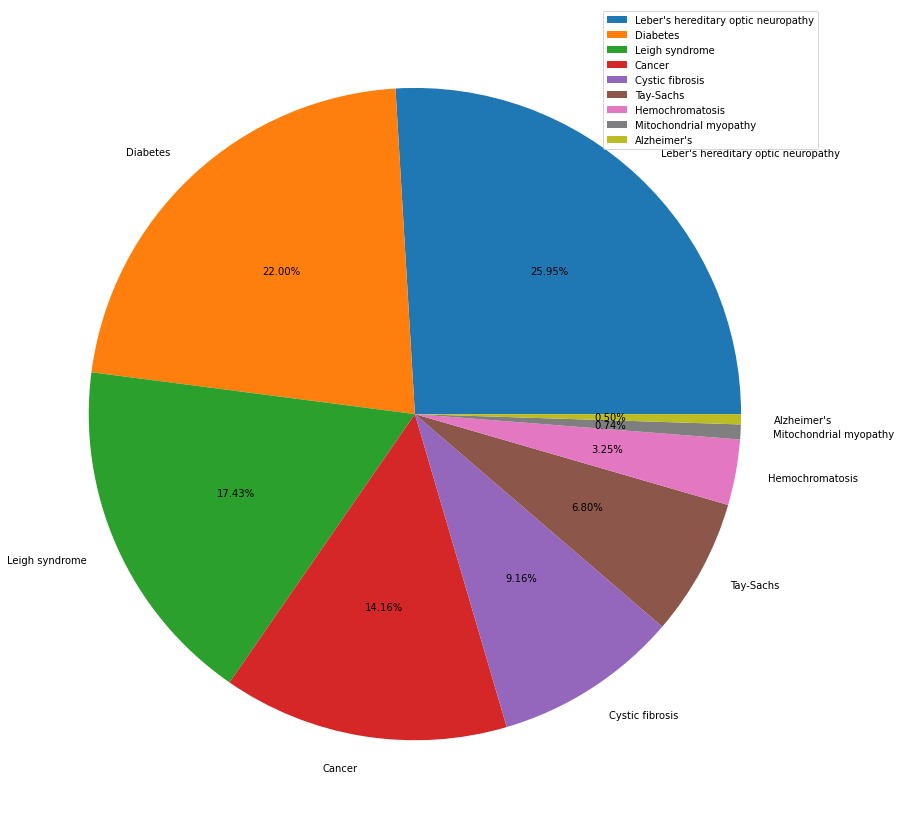

In [173]:
#plt.figure(figsize=(15,15))
#df['Disorder_Subclass'].value_counts().plot(kind='pie')
#plt.legend(loc = 'upper right')

DS_labels = df['Disorder_Subclass'].unique()
DS_values = df['Disorder_Subclass'].value_counts()
plt.figure(figsize=(15,15))
plt.pie(DS_values, labels=DS_labels, autopct='%1.2f%%')
plt.legend(loc = 'upper right')

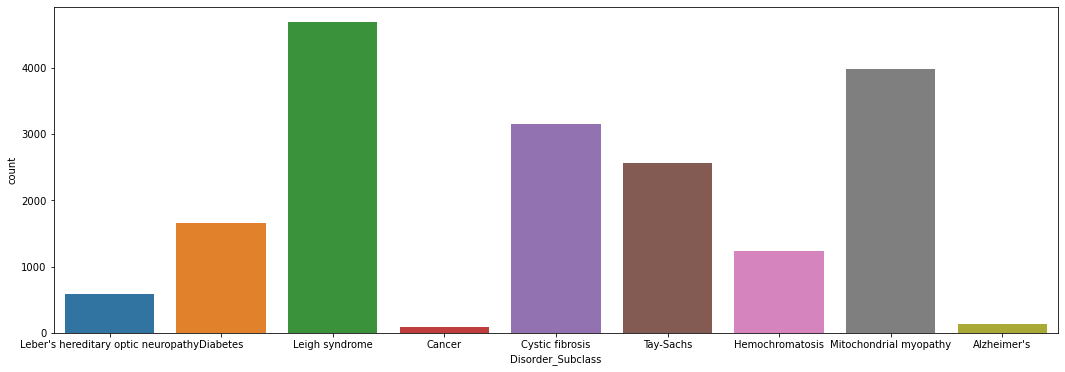

In [28]:
plt.figure(figsize=(18, 6))
sns.countplot(x = 'Disorder_Subclass', data = df);

Histograms for each Numeric variable in df

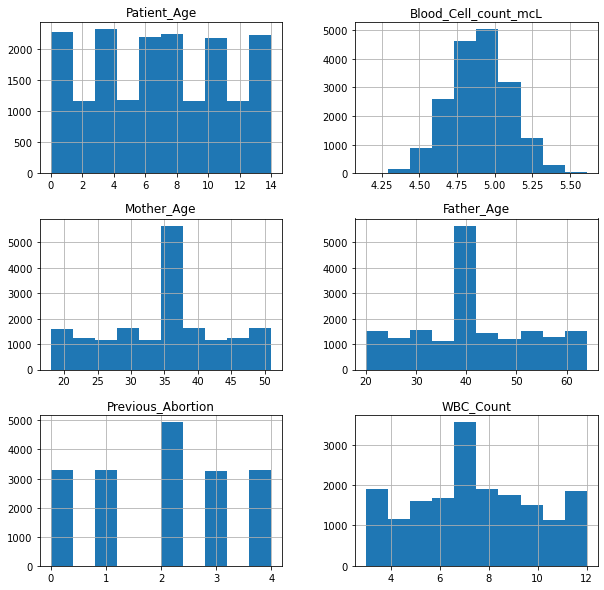

In [29]:
#histograms for each variable in df
hist = df.hist(bins=10,figsize =(10,10))

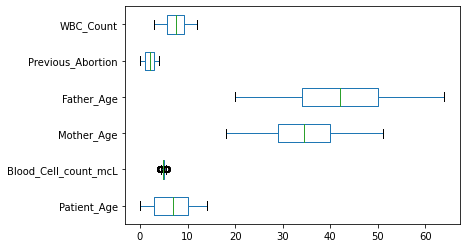

In [30]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=10)

For Plotting relation between Categorical vs Categorical variables, Use Bar Chart or count plot.

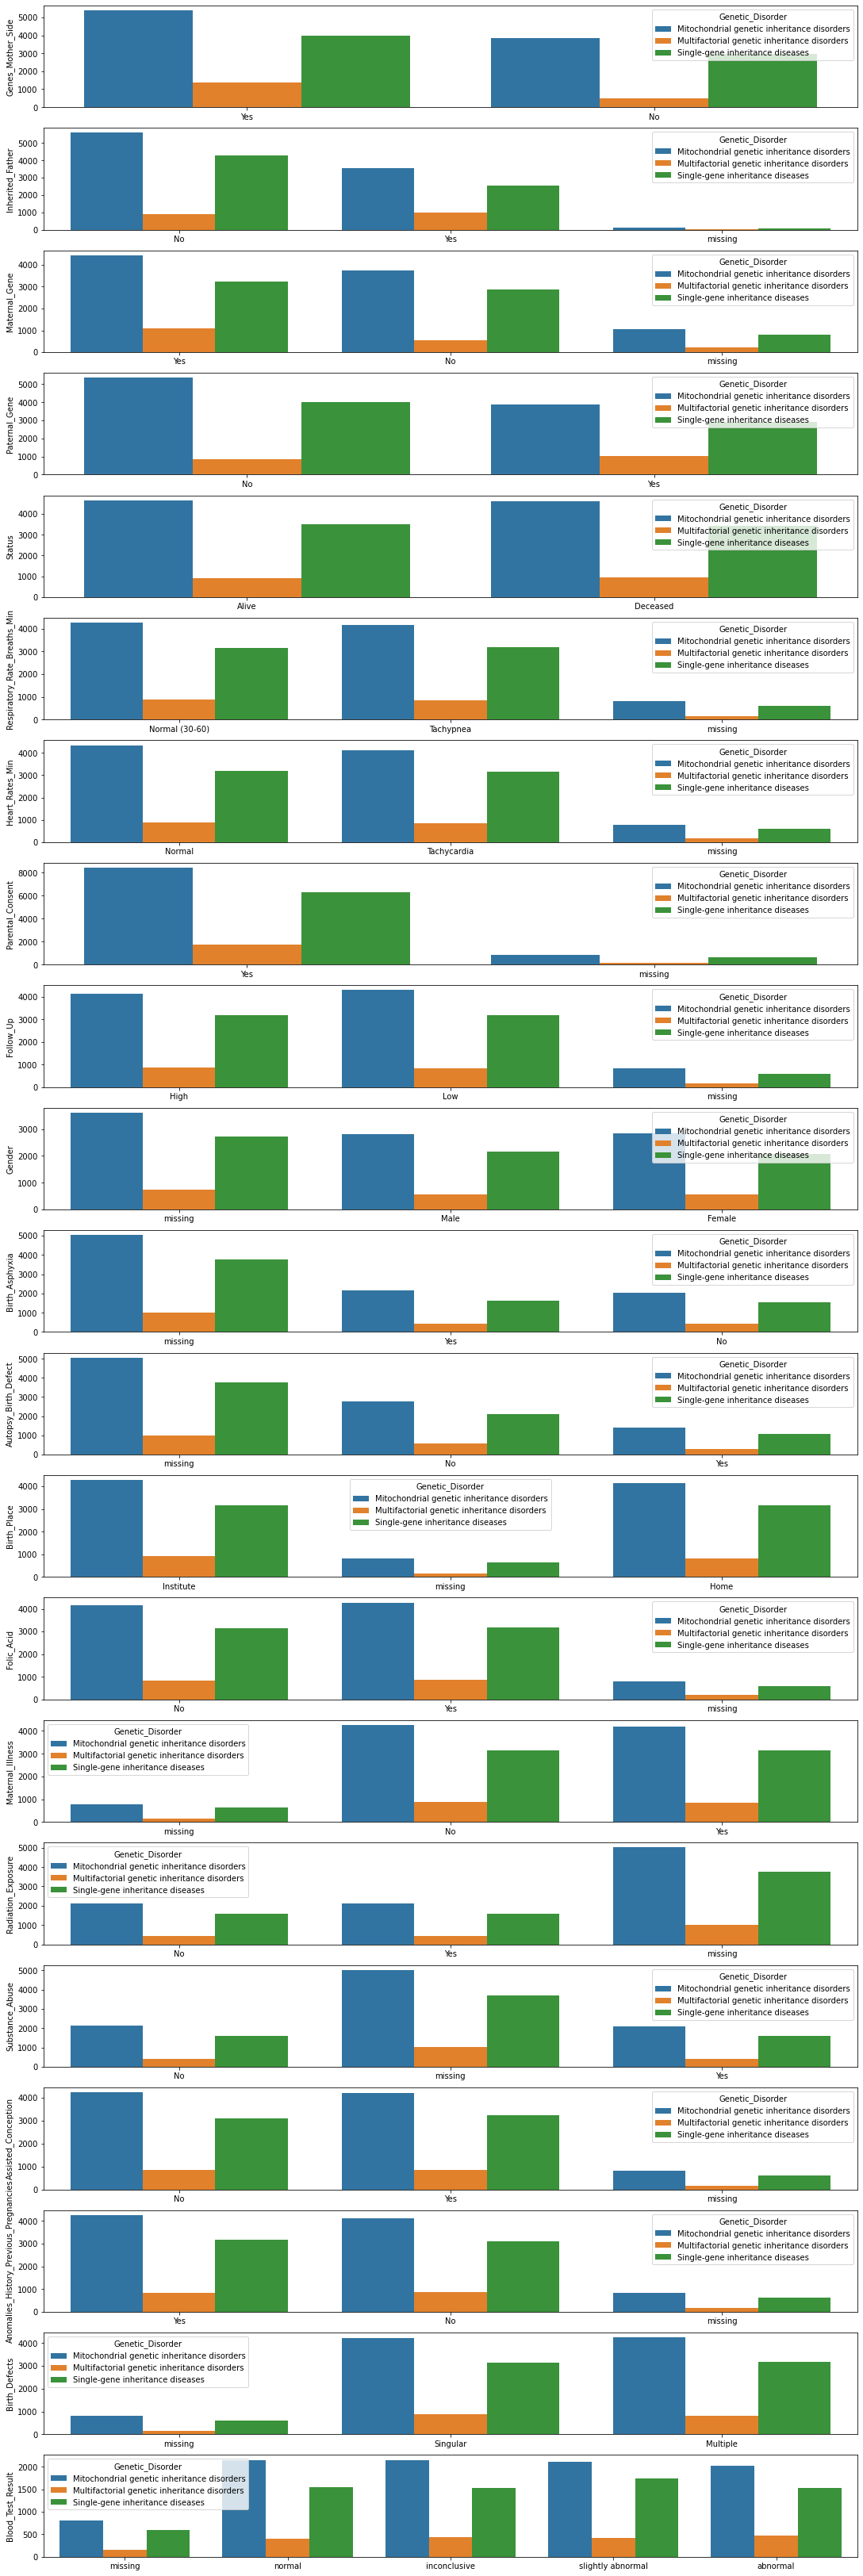

In [31]:
cat_cols=['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'Anomalies_History_Previous_Pregnancies',
       'Birth_Defects', 'Blood_Test_Result']

fig, ax = plt.subplots(len(cat_cols),  figsize = (15, 45), constrained_layout = True)

for i, var in enumerate(cat_cols): 
    sns.countplot(data = df, x = var, hue = 'Genetic_Disorder', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

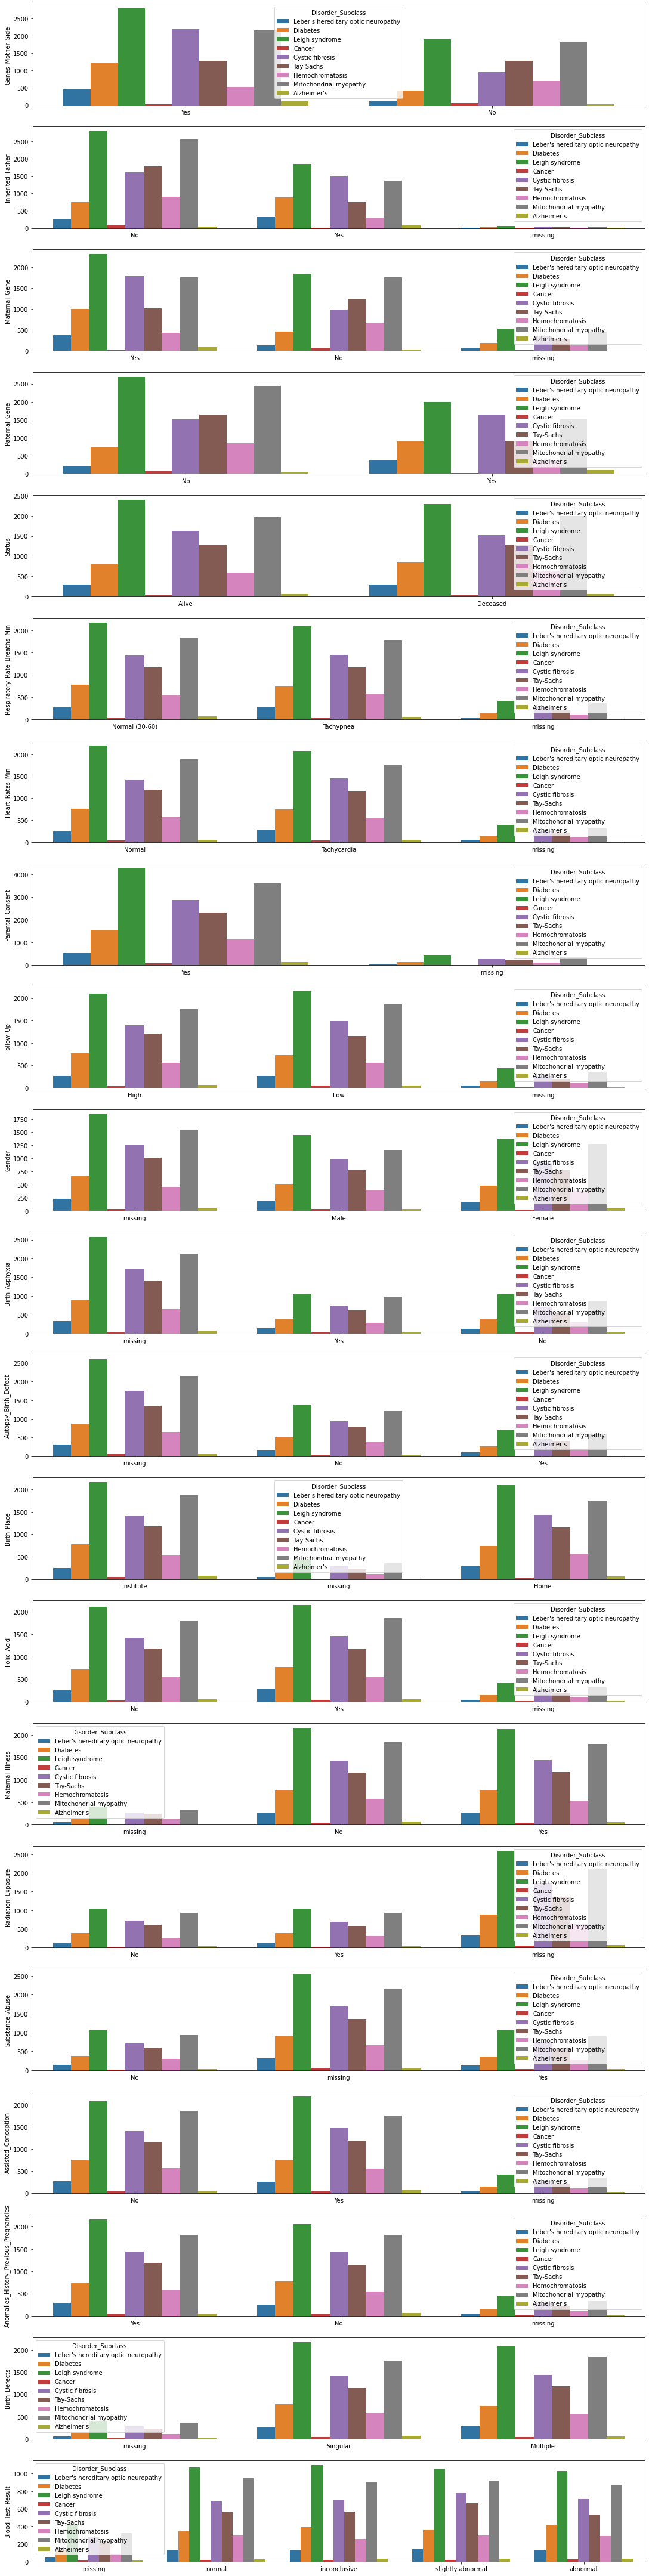

In [32]:
cat_cols=['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'Anomalies_History_Previous_Pregnancies',
       'Birth_Defects', 'Blood_Test_Result']

fig, ax = plt.subplots(len(cat_cols),  figsize = (15, 60), constrained_layout = True)

for i, var in enumerate(cat_cols): 
    sns.countplot(data = df, x = var, hue = 'Disorder_Subclass', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

<AxesSubplot:xlabel='Genetic_Disorder', ylabel='Patient_Age'>

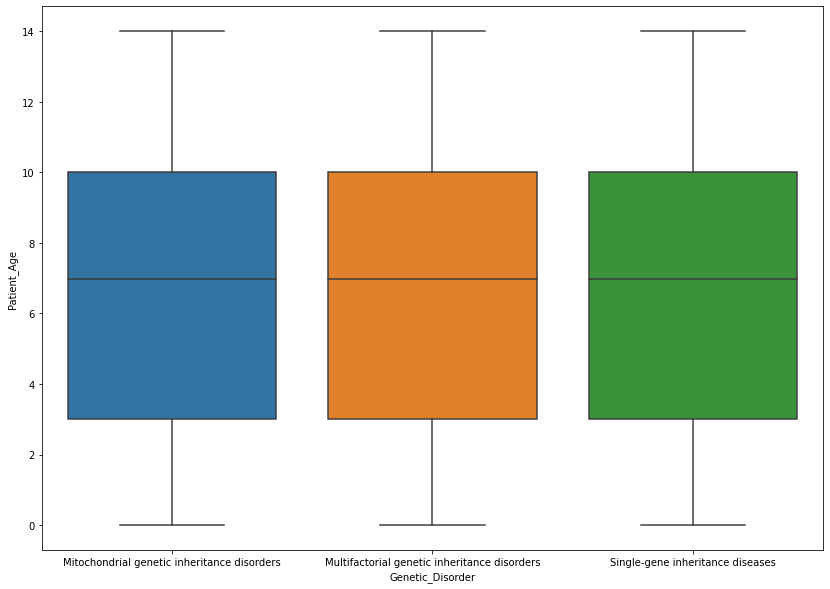

In [33]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='Genetic_Disorder', y='Patient_Age', data=df)

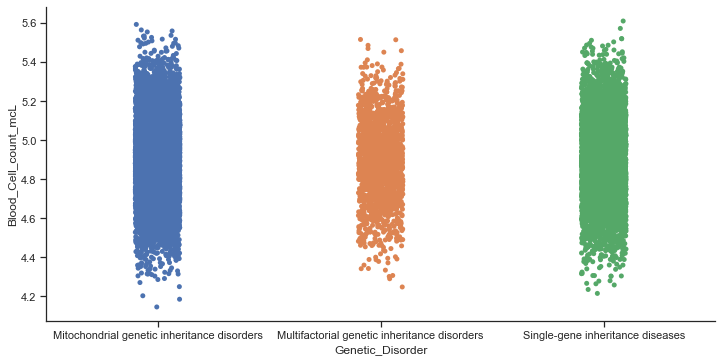

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="Genetic_Disorder", y="Blood_Cell_count_mcL",  data=df, height=5, aspect=2)

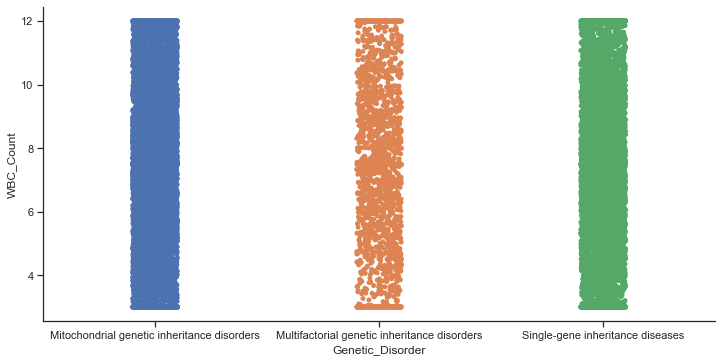

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="Genetic_Disorder", y="WBC_Count",  data=df, height=5, aspect=2)

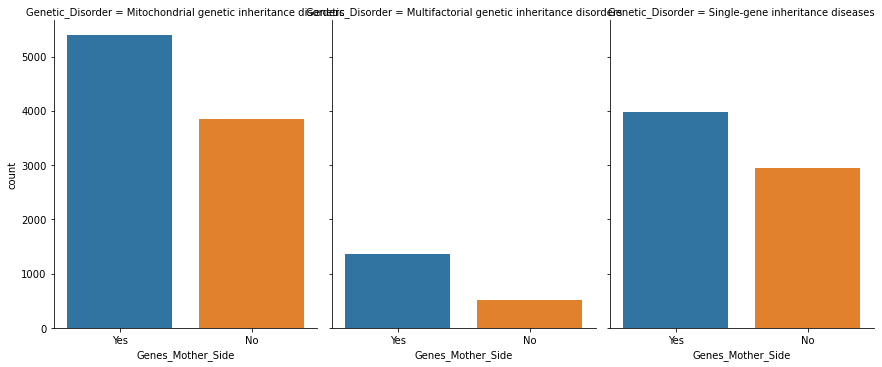

In [176]:
#count plot for one variable
#print(df.columns)
#sns.countplot(data = df, x = df_cat['Genes_Mother_Side'])

sns.catplot(x="Genes_Mother_Side", col="Genetic_Disorder", col_wrap=4,
                data=df,
                kind="count", height=5, aspect=.8)

In [190]:
df.head()

Patient_Age Genes_Mother_Side Inherited_Father Maternal_Gene Paternal_Gene  \
0          2.0               Yes               No           Yes            No   
2          6.0               Yes               No            No            No   
3         12.0               Yes               No           Yes            No   
4         11.0               Yes               No       missing           Yes   
5         14.0               Yes               No           Yes            No   

   Blood_Cell_count_mcL  Mother_Age  Father_Age    Status  \
0              4.760603       34.53       41.97     Alive   
2              4.893297       41.00       22.00     Alive   
3              4.705280       21.00       41.97  Deceased   
4              4.720703       32.00       41.97     Alive   
5              5.103188       34.53       41.97  Deceased   

  Respiratory_Rate_Breaths_Min  ... Radiation_Exposure Substance_Abuse  \
0               Normal (30-60)  ...                 No              No   
2               Normal (30-60)  ...                Yes         missing   
3                    Tachypnea  ...            missing         missing   
4                    Tachypnea  ...            missing         missing   
5                      missing  ...                 No              No   

  Assisted_Conception Anomalies_History_Previous_Pregnancies  \
0                  No                                    Yes   
2                 Yes                                    Yes   
3             missing                                    Yes   
4                 Yes                                     No   
5             missing                                     No   

  Previous_Abortion Birth_Defects  WBC_Count Blood_Test_Result  \
0               2.0       missing   9.857562           missing   
2               4.0      Singular   7.490000            normal   
3               1.0      Singular   7.919321      inconclusive   
4               4.0      Multiple   4.098210           missing   
5               0.0      Multiple  10.272230            normal   

                               Genetic_Disorder  \
0   Mitochondrial genetic inheritance disorders   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   
5              Single-gene inheritance diseases   

                     Disorder_Subclass  
0  Leber's hereditary optic neuropathy  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  
5                      Cystic fibrosis  

[5 rows x 29 columns]

<Figure size 1080x576 with 0 Axes>

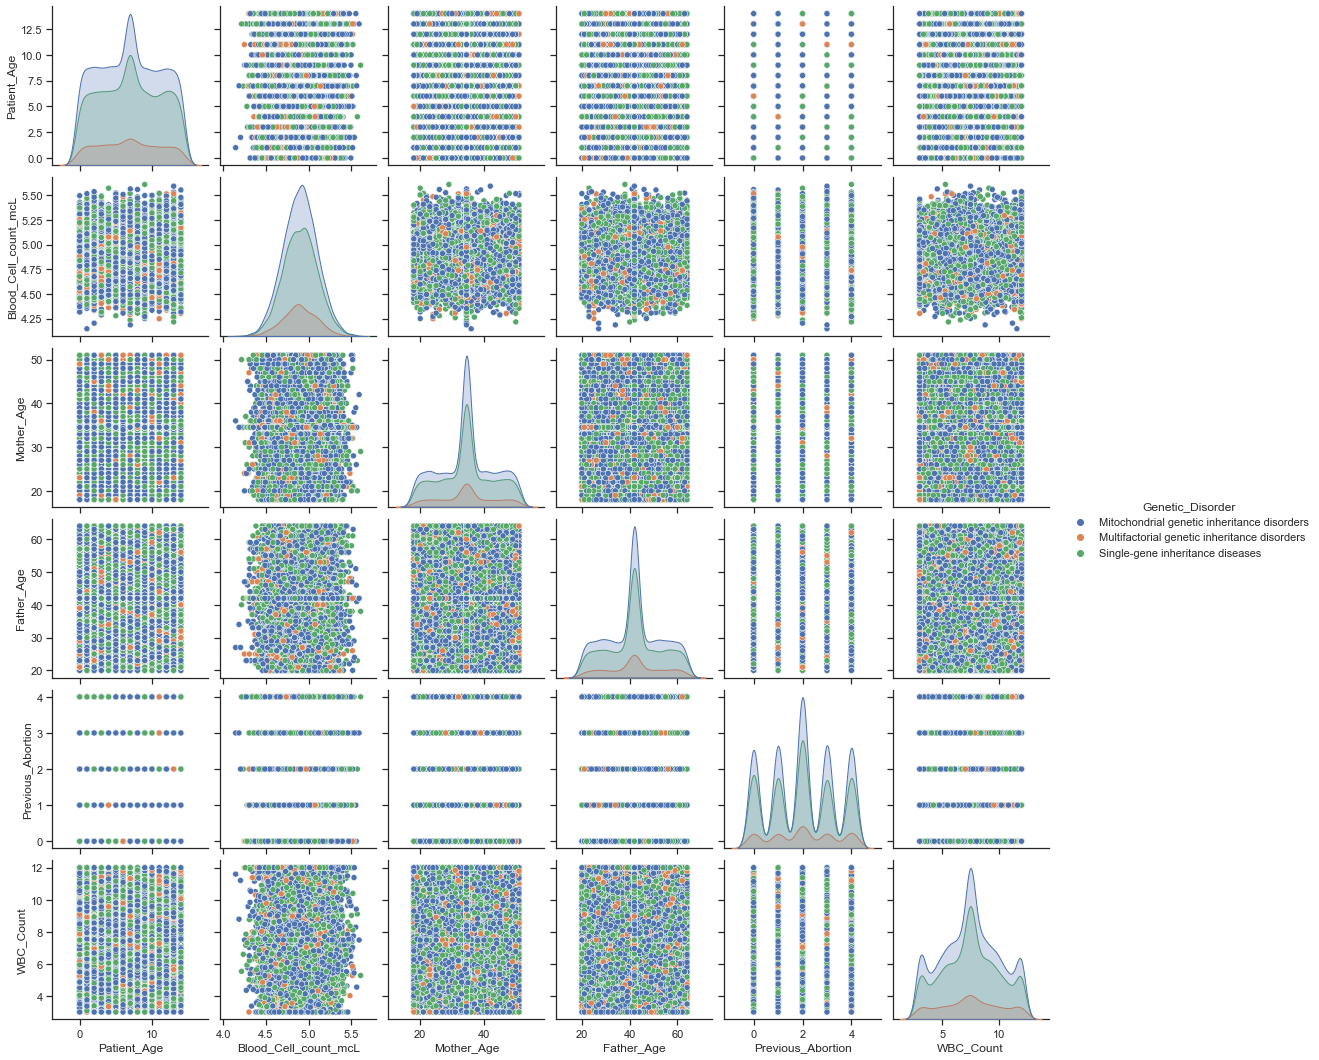

In [189]:
figure = plt.figure(figsize=(15,8))
sns.pairplot(df,hue="Genetic_Disorder")
plt.show()

In [35]:
df.isna().sum()

Patient_Age                               0
Genes_Mother_Side                         0
Inherited_Father                          0
Maternal_Gene                             0
Paternal_Gene                             0
Blood_Cell_count_mcL                      0
Mother_Age                                0
Father_Age                                0
Status                                    0
Respiratory_Rate_Breaths_Min              0
Heart_Rates_Min                           0
Parental_Consent                          0
Follow_Up                                 0
Gender                                    0
Birth_Asphyxia                            0
Autopsy_Birth_Defect                      0
Birth_Place                               0
Folic_Acid                                0
Maternal_Illness                          0
Radiation_Exposure                        0
Substance_Abuse                           0
Assisted_Conception                       0
Anomalies_History_Previous_Pregn

In [36]:
df.columns

Index(['Patient_Age', 'Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Blood_Cell_count_mcL', 'Mother_Age', 'Father_Age',
       'Status', 'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min',
       'Parental_Consent', 'Follow_Up', 'Gender', 'Birth_Asphyxia',
       'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid', 'Maternal_Illness',
       'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception',
       'Anomalies_History_Previous_Pregnancies', 'Previous_Abortion',
       'Birth_Defects', 'WBC_Count', 'Blood_Test_Result', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

In [37]:
from pathlib import Path  
filepath = Path('../data/train_clean.csv') 
df.to_csv(filepath, index=False)  

# Step 3 : Pre-Processing

In [38]:
from pathlib import Path  
filepath = Path('../data/train_clean.csv') 
clean_data = pd.read_csv(filepath)
clean_data.head()

Patient_Age Genes_Mother_Side Inherited_Father Maternal_Gene Paternal_Gene  \
0          2.0               Yes               No           Yes            No   
1          6.0               Yes               No            No            No   
2         12.0               Yes               No           Yes            No   
3         11.0               Yes               No       missing           Yes   
4         14.0               Yes               No           Yes            No   

   Blood_Cell_count_mcL  Mother_Age  Father_Age    Status  \
0              4.760603       34.53       41.97     Alive   
1              4.893297       41.00       22.00     Alive   
2              4.705280       21.00       41.97  Deceased   
3              4.720703       32.00       41.97     Alive   
4              5.103188       34.53       41.97  Deceased   

  Respiratory_Rate_Breaths_Min  ... Radiation_Exposure Substance_Abuse  \
0               Normal (30-60)  ...                 No              No   
1               Normal (30-60)  ...                Yes         missing   
2                    Tachypnea  ...            missing         missing   
3                    Tachypnea  ...            missing         missing   
4                      missing  ...                 No              No   

  Assisted_Conception Anomalies_History_Previous_Pregnancies  \
0                  No                                    Yes   
1                 Yes                                    Yes   
2             missing                                    Yes   
3                 Yes                                     No   
4             missing                                     No   

  Previous_Abortion Birth_Defects  WBC_Count Blood_Test_Result  \
0               2.0       missing   9.857562           missing   
1               4.0      Singular   7.490000            normal   
2               1.0      Singular   7.919321      inconclusive   
3               4.0      Multiple   4.098210           missing   
4               0.0      Multiple  10.272230            normal   

                               Genetic_Disorder  \
0   Mitochondrial genetic inheritance disorders   
1  Multifactorial genetic inheritance disorders   
2   Mitochondrial genetic inheritance disorders   
3  Multifactorial genetic inheritance disorders   
4              Single-gene inheritance diseases   

                     Disorder_Subclass  
0  Leber's hereditary optic neuropathy  
1                             Diabetes  
2                       Leigh syndrome  
3                               Cancer  
4                      Cystic fibrosis  

[5 rows x 29 columns]

In [39]:
clean_data.columns

Index(['Patient_Age', 'Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Blood_Cell_count_mcL', 'Mother_Age', 'Father_Age',
       'Status', 'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min',
       'Parental_Consent', 'Follow_Up', 'Gender', 'Birth_Asphyxia',
       'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid', 'Maternal_Illness',
       'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception',
       'Anomalies_History_Previous_Pregnancies', 'Previous_Abortion',
       'Birth_Defects', 'WBC_Count', 'Blood_Test_Result', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

Select data related to only one target variable  : Genetic_disorder

In [40]:
#reference : https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
GD_data = clean_data.drop(columns=[ 'Disorder_Subclass'], axis=1)                                      

use small and simple names to genetic disorder categories

In [41]:
GD_data["Genetic_Disorder"] = GD_data["Genetic_Disorder"].replace(to_replace = 'Mitochondrial genetic inheritance disorders', value='Mitochondrial')
GD_data["Genetic_Disorder"] = GD_data["Genetic_Disorder"].replace(to_replace = 'Single-gene inheritance diseases', value='Single_gene')
GD_data["Genetic_Disorder"] = GD_data["Genetic_Disorder"].replace(to_replace = 'Multifactorial genetic inheritance disorders', value='Multifactorial')
#GD_data["Genetic_Disorder"] = GD_data["Genetic_Disorder"].astype(int)

# check the diff between Mitochondrial and Multifactorial

In [42]:
GD_data.head()

Patient_Age Genes_Mother_Side Inherited_Father Maternal_Gene Paternal_Gene  \
0          2.0               Yes               No           Yes            No   
1          6.0               Yes               No            No            No   
2         12.0               Yes               No           Yes            No   
3         11.0               Yes               No       missing           Yes   
4         14.0               Yes               No           Yes            No   

   Blood_Cell_count_mcL  Mother_Age  Father_Age    Status  \
0              4.760603       34.53       41.97     Alive   
1              4.893297       41.00       22.00     Alive   
2              4.705280       21.00       41.97  Deceased   
3              4.720703       32.00       41.97     Alive   
4              5.103188       34.53       41.97  Deceased   

  Respiratory_Rate_Breaths_Min  ... Maternal_Illness Radiation_Exposure  \
0               Normal (30-60)  ...          missing                 No   
1               Normal (30-60)  ...               No                Yes   
2                    Tachypnea  ...              Yes            missing   
3                    Tachypnea  ...              Yes            missing   
4                      missing  ...               No                 No   

  Substance_Abuse Assisted_Conception Anomalies_History_Previous_Pregnancies  \
0              No                  No                                    Yes   
1         missing                 Yes                                    Yes   
2         missing             missing                                    Yes   
3         missing                 Yes                                     No   
4              No             missing                                     No   

  Previous_Abortion Birth_Defects  WBC_Count Blood_Test_Result  \
0               2.0       missing   9.857562           missing   
1               4.0      Singular   7.490000            normal   
2               1.0      Singular   7.919321      inconclusive   
3               4.0      Multiple   4.098210           missing   
4               0.0      Multiple  10.272230            normal   

  Genetic_Disorder  
0    Mitochondrial  
1   Multifactorial  
2    Mitochondrial  
3   Multifactorial  
4      Single_gene  

[5 rows x 28 columns]

Before feeding the data to model, we need to convert the categorical column into a numerical one. 
This is required to do since the machine learning algorithms only work on the numerical data
One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable 
into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical 
value in the record.

get_dummies is the method that creates a dummy variable for each categorical variable.

Split the data into X and y

In [43]:
X = GD_data.drop('Genetic_Disorder', axis=1)
cat_cols = X.select_dtypes(include='object').columns.values
X=pd.get_dummies(X, columns= cat_cols, prefix =cat_cols)
y=GD_data['Genetic_Disorder']

In [44]:
X.columns

Index(['Patient_Age', 'Blood_Cell_count_mcL', 'Mother_Age', 'Father_Age',
       'Previous_Abortion', 'WBC_Count', 'Genes_Mother_Side_No',
       'Genes_Mother_Side_Yes', 'Inherited_Father_No', 'Inherited_Father_Yes',
       'Inherited_Father_missing', 'Maternal_Gene_No', 'Maternal_Gene_Yes',
       'Maternal_Gene_missing', 'Paternal_Gene_No', 'Paternal_Gene_Yes',
       'Status_Alive', 'Status_Deceased',
       'Respiratory_Rate_Breaths_Min_Normal (30-60)',
       'Respiratory_Rate_Breaths_Min_Tachypnea',
       'Respiratory_Rate_Breaths_Min_missing', 'Heart_Rates_Min_Normal',
       'Heart_Rates_Min_Tachycardia', 'Heart_Rates_Min_missing',
       'Parental_Consent_Yes', 'Parental_Consent_missing', 'Follow_Up_High',
       'Follow_Up_Low', 'Follow_Up_missing', 'Gender_Female', 'Gender_Male',
       'Gender_missing', 'Birth_Asphyxia_No', 'Birth_Asphyxia_Yes',
       'Birth_Asphyxia_missing', 'Autopsy_Birth_Defect_No',
       'Autopsy_Birth_Defect_Yes', 'Autopsy_Birth_Defect_missing',
 

In [45]:
X.corr()

Patient_Age  Blood_Cell_count_mcL  \
Patient_Age                             1.000000              0.009777   
Blood_Cell_count_mcL                    0.009777              1.000000   
Mother_Age                             -0.006142             -0.004398   
Father_Age                             -0.008091              0.003601   
Previous_Abortion                      -0.007037             -0.007439   
...                                          ...                   ...   
Blood_Test_Result_abnormal              0.001141             -0.011116   
Blood_Test_Result_inconclusive         -0.003676              0.014500   
Blood_Test_Result_missing              -0.009181             -0.007020   
Blood_Test_Result_normal               -0.010994             -0.003139   
Blood_Test_Result_slightly abnormal     0.019439              0.004328   

                                     Mother_Age  Father_Age  \
Patient_Age                           -0.006142   -0.008091   
Blood_Cell_count_mcL                  -0.004398    0.003601   
Mother_Age                             1.000000    0.001281   
Father_Age                             0.001281    1.000000   
Previous_Abortion                      0.010025    0.000556   
...                                         ...         ...   
Blood_Test_Result_abnormal            -0.010839   -0.000734   
Blood_Test_Result_inconclusive         0.007914    0.005142   
Blood_Test_Result_missing             -0.002212    0.000752   
Blood_Test_Result_normal               0.003189    0.002767   
Blood_Test_Result_slightly abnormal    0.001133   -0.007586   

                                     Previous_Abortion  WBC_Count  \
Patient_Age                                  -0.007037  -0.008292   
Blood_Cell_count_mcL                         -0.007439   0.002473   
Mother_Age                                    0.010025   0.015616   
Father_Age                                    0.000556   0.014544   
Previous_Abortion                             1.000000   0.003825   
...                                                ...        ...   
Blood_Test_Result_abnormal                   -0.003258  -0.007759   
Blood_Test_Result_inconclusive               -0.001564   0.006537   
Blood_Test_Result_missing                    -0.003247   0.005028   
Blood_Test_Result_normal                      0.001182  -0.001897   
Blood_Test_Result_slightly abnormal           0.005726  -0.000310   

                                     Genes_Mother_Side_No  \
Patient_Age                                     -0.001930   
Blood_Cell_count_mcL                            -0.001026   
Mother_Age                                      -0.009674   
Father_Age                                       0.009144   
Previous_Abortion                               -0.002627   
...                                                   ...   
Blood_Test_Result_abnormal                      -0.006889   
Blood_Test_Result_inconclusive                   0.009154   
Blood_Test_Result_missing                       -0.000395   
Blood_Test_Result_normal                         0.005739   
Blood_Test_Result_slightly abnormal             -0.007684   

                                     Genes_Mother_Side_Yes  \
Patient_Age                                       0.001930   
Blood_Cell_count_mcL                              0.001026   
Mother_Age                                        0.009674   
Father_Age                                       -0.009144   
Previous_Abortion                                 0.002627   
...                                                    ...   
Blood_Test_Result_abnormal                        0.006889   
Blood_Test_Result_inconclusive                   -0.009154   
Blood_Test_Result_missing                         0.000395   
Blood_Test_Result_normal                         -0.005739   
Blood_Test_Result_slightly abnormal               0.007684   

                                     Inherited_Father_No  \
Patient_Age             

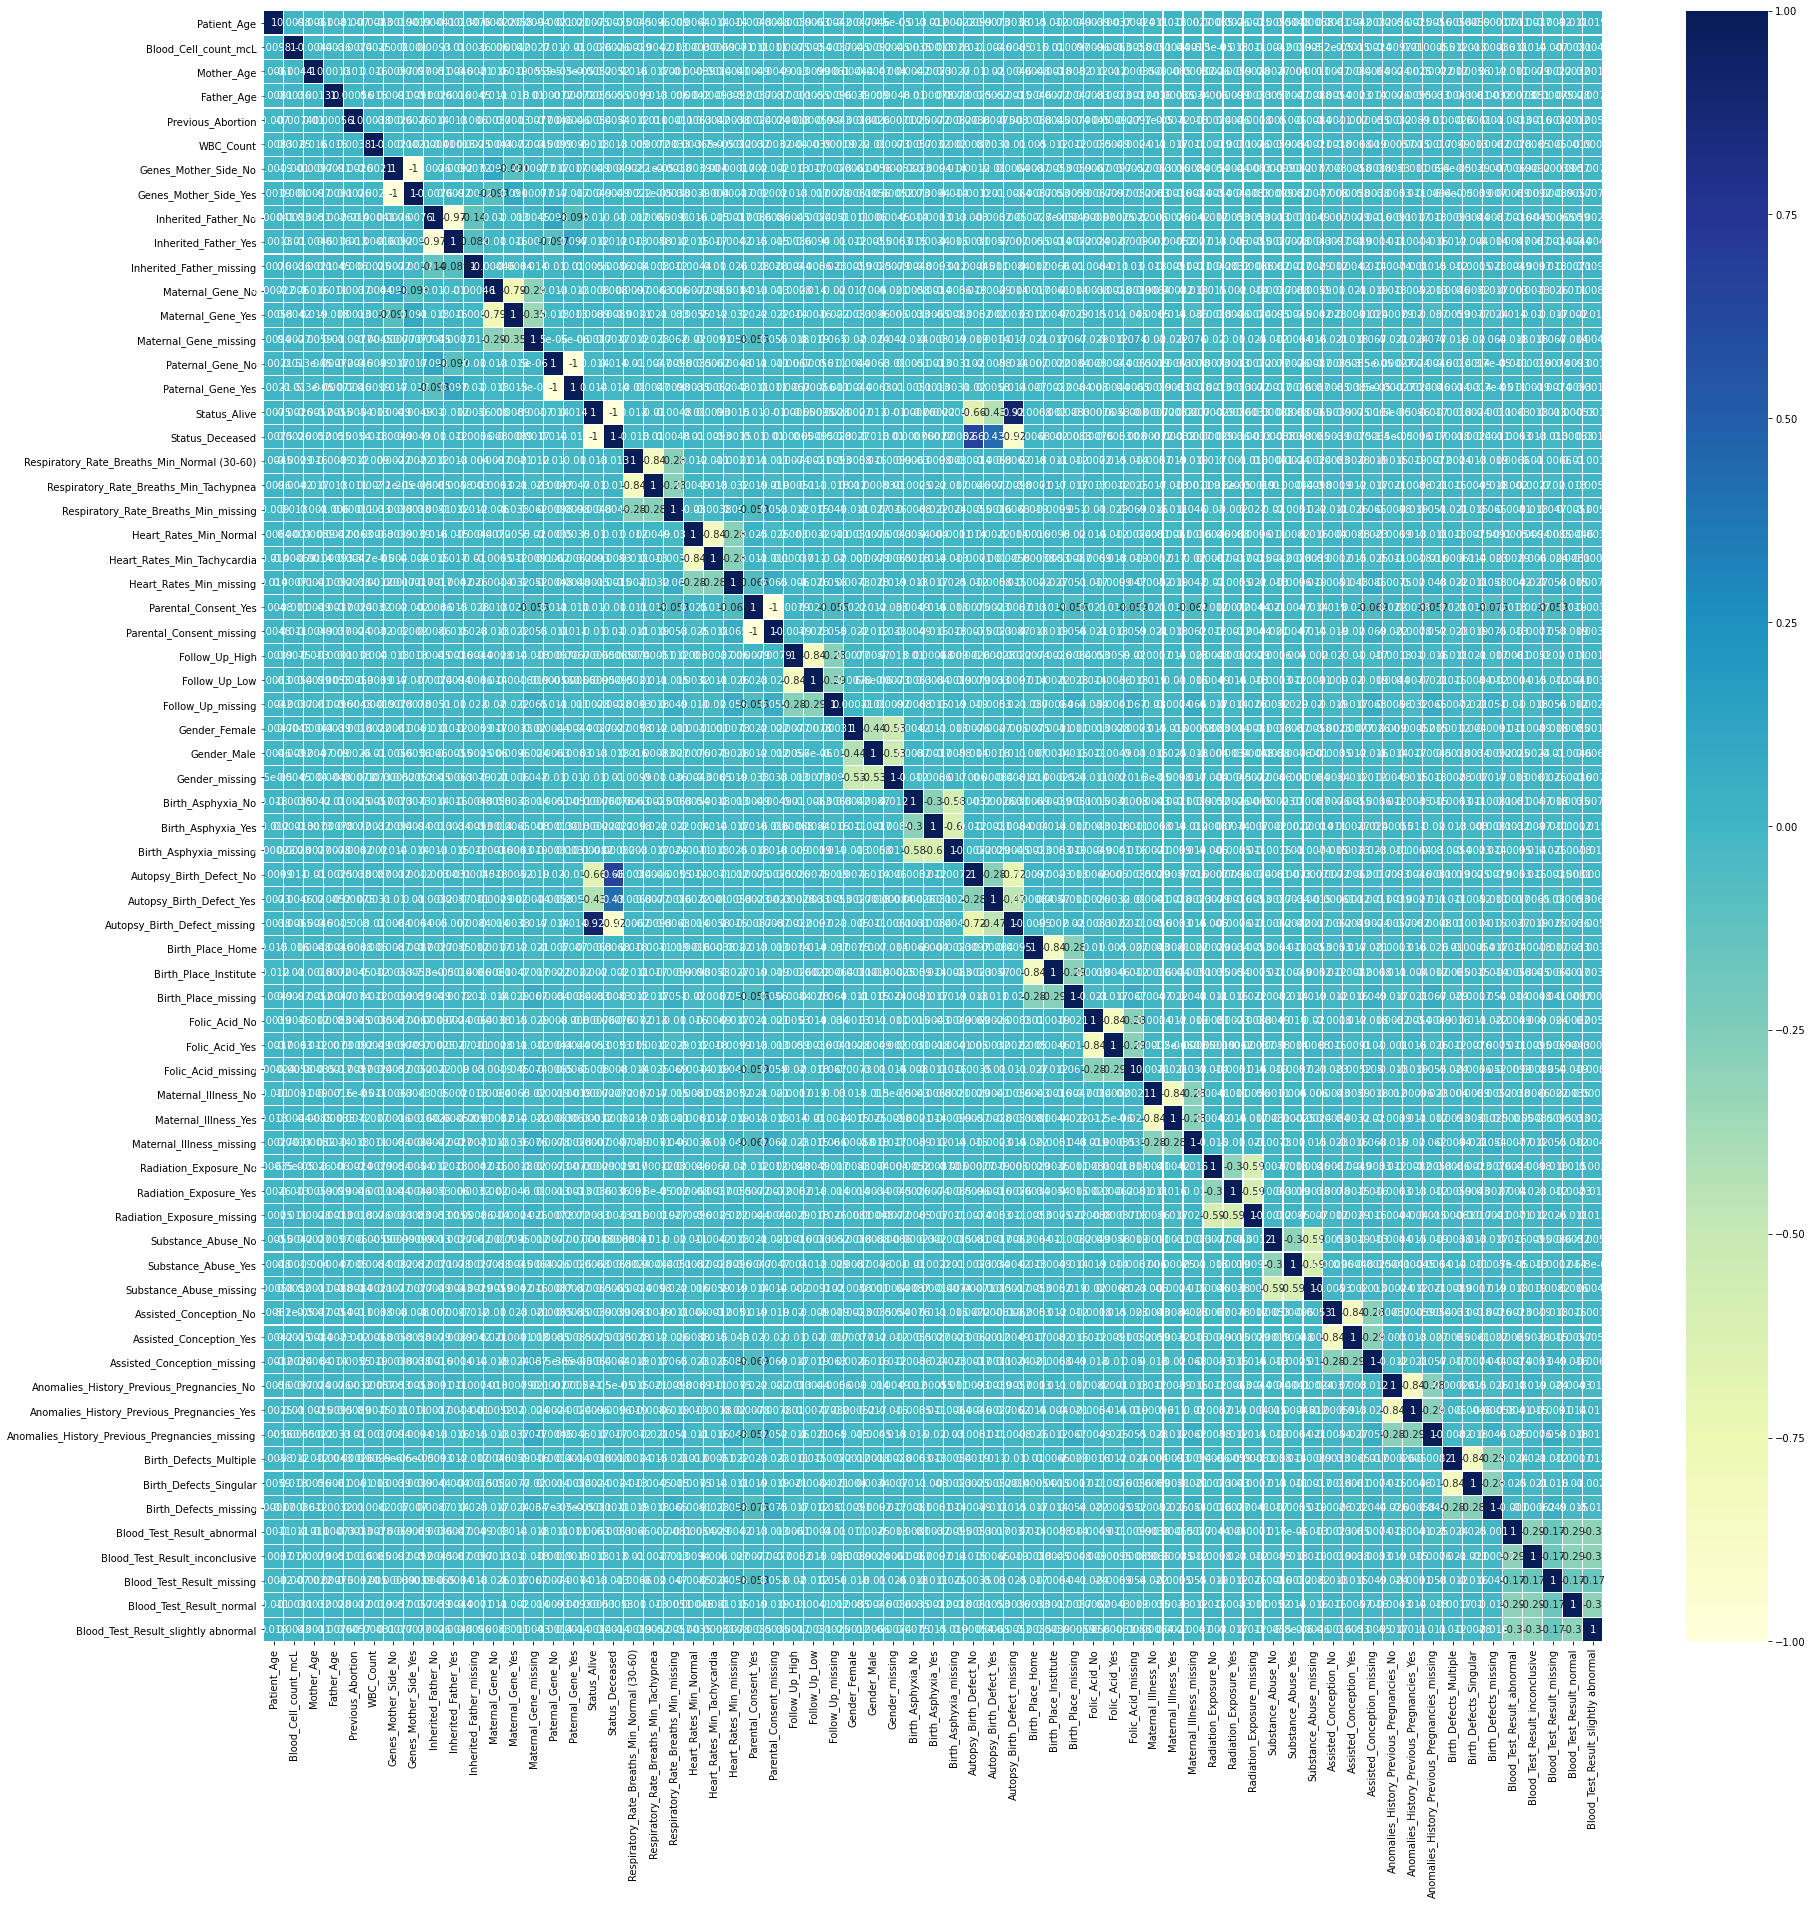

In [46]:
### create the correlation matrix heat map
plt.figure(figsize=(30,30))
sns.heatmap(X.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [47]:
X.describe()

Patient_Age  Blood_Cell_count_mcL    Mother_Age    Father_Age  \
count  18047.000000          18047.000000  18047.000000  18047.000000   
mean       6.950030              4.899198     34.564981     41.971932   
std        4.185769              0.199061      8.524106     11.353151   
min        0.000000              4.146230     18.000000     20.000000   
25%        3.000000              4.764199     29.000000     34.000000   
50%        6.970000              4.900306     34.530000     41.970000   
75%       10.000000              5.033654     40.000000     50.000000   
max       14.000000              5.609829     51.000000     64.000000   

       Previous_Abortion     WBC_Count  Genes_Mother_Side_No  \
count       18047.000000  18047.000000          18047.000000   
mean            1.999501      7.477010              0.404721   
std             1.347744      2.530330              0.490852   
min             0.000000      3.000000              0.000000   
25%             1.000000      5.628244              0.000000   
50%             2.000000      7.490000              0.000000   
75%             3.000000      9.286786              1.000000   
max             4.000000     12.000000              1.000000   

       Genes_Mother_Side_Yes  Inherited_Father_No  Inherited_Father_Yes  ...  \
count           18047.000000         18047.000000          18047.000000  ...   
mean                0.595279             0.596941              0.390868  ...   
std                 0.490852             0.490526              0.487958  ...   
min                 0.000000             0.000000              0.000000  ...   
25%                 0.000000             0.000000              0.000000  ...   
50%                 1.000000             1.000000              0.000000  ...   
75%                 1.000000             1.000000              1.000000  ...   
max                 1.000000             1.000000              1.000000  ...   

       Anomalies_History_Previous_Pregnancies_Yes  \
count                                18047.000000   
mean                                     0.459079   
std                                      0.498336   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      1.000000   
max                                      1.000000   

       Anomalies_History_Previous_Pregnancies_missing  Birth_Defects_Multiple  \
count                                    18047.000000            18047.000000   
mean                                         0.089433                0.456696   
std                                          0.285376                0.498135   
min                                          0.000000                0.000000   
25%                                          0.000000                0.000000   
50%                                          0.000000                0.000000   
75%                                          0.000000                1.000000   
max                                          1.000000                1.000000   

       Birth_Defects_Singular  Birth_Defects_missing  \
count            18047.000000           18047.000000   
mean                 0.456586               0.086718   
std                  0.498125               0.281429   
min                  0.000000               0.000000   
25%                  0.000000               0.000000   
50%                  0.000000               0.000000   
75%                  1.000000               0.000000   
max                  1.000000               1.000000   

       Blood_Test_Result_abnormal  Blood_Test_Result_inconclusive  \
count                18047.000000                    18047.000000   
mean                     0.223084                        0.227683   
std                      0.416326                        0.419349   
min                      0.000000                        0.0000

In [48]:
#X = genetic_data.drop('Genetic_Disorder', axis=1)
X.head()

Patient_Age  Blood_Cell_count_mcL  Mother_Age  Father_Age  \
0          2.0              4.760603       34.53       41.97   
1          6.0              4.893297       41.00       22.00   
2         12.0              4.705280       21.00       41.97   
3         11.0              4.720703       32.00       41.97   
4         14.0              5.103188       34.53       41.97   

   Previous_Abortion  WBC_Count  Genes_Mother_Side_No  Genes_Mother_Side_Yes  \
0                2.0   9.857562                     0                      1   
1                4.0   7.490000                     0                      1   
2                1.0   7.919321                     0                      1   
3                4.0   4.098210                     0                      1   
4                0.0  10.272230                     0                      1   

   Inherited_Father_No  Inherited_Father_Yes  ...  \
0                    1                     0  ...   
1                    1                     0  ...   
2                    1                     0  ...   
3                    1                     0  ...   
4                    1                     0  ...   

   Anomalies_History_Previous_Pregnancies_Yes  \
0                                           1   
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   Anomalies_History_Previous_Pregnancies_missing  Birth_Defects_Multiple  \
0                                               0                       0   
1                                               0                       0   
2                                               0                       0   
3                                               0                       1   
4                                               0                       1   

   Birth_Defects_Singular  Birth_Defects_missing  Blood_Test_Result_abnormal  \
0                       0                      1                           0   
1                       1                      0                           0   
2                       1                      0                           0   
3                       0                      0                           0   
4                       0                      0                           0   

   Blood_Test_Result_inconclusive  Blood_Test_Result_missing  \
0                               0                          1   
1                               0                          0   
2                               1                          0   
3                               0                          1   
4                               0                          0   

   Blood_Test_Result_normal  Blood_Test_Result_slightly abnormal  
0                         0                                    0  
1                         1                                    0  
2                         0                                    0  
3                         0                                    0  
4                         1                                    0  

[5 rows x 67 columns]

In [49]:
X.shape

(18047, 67)

In [50]:
X.isna().sum()

Patient_Age                            0
Blood_Cell_count_mcL                   0
Mother_Age                             0
Father_Age                             0
Previous_Abortion                      0
                                      ..
Blood_Test_Result_abnormal             0
Blood_Test_Result_inconclusive         0
Blood_Test_Result_missing              0
Blood_Test_Result_normal               0
Blood_Test_Result_slightly abnormal    0
Length: 67, dtype: int64

In [51]:
y.unique()

array(['Mitochondrial', 'Multifactorial', 'Single_gene'], dtype=object)

In [52]:
y.value_counts()

Mitochondrial     9241
Single_gene       6929
Multifactorial    1877
Name: Genetic_Disorder, dtype: int64

we can see here that the data is not balanced among the classes.

In [53]:
from sklearn.model_selection import train_test_split
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [55]:
y_train

array([0, 2, 0, ..., 0, 2, 0])

In [56]:
X_train.shape, X_test.shape

((12632, 67), (5415, 67))

In [57]:
y_train.shape, y_test.shape

((12632,), (5415,))

In [58]:
# Logistic, SVM, Neural Networks and KNN are sensitive to scaling.  
#Since we are using these algorithms, we should use scaled data in these models.

from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_scaled=scaler.transform(X)

In [59]:
X_train_scaled

array([[-0.22116346,  0.35564054,  0.16019054, ..., -0.30761564,
         1.84470265, -0.55808762],
       [ 0.00999764,  0.06382316, -0.42865479, ...,  3.25080999,
        -0.54209279, -0.55808762],
       [-0.22116346,  1.49521718, -0.01292998, ..., -0.30761564,
        -0.54209279,  1.79183333],
       ...,
       [ 0.00999764,  1.64345655, -0.01292998, ...,  3.25080999,
        -0.54209279, -0.55808762],
       [ 1.44700947, -0.07450628, -0.01292998, ..., -0.30761564,
        -0.54209279, -0.55808762],
       [ 1.20869905, -1.93109226,  1.45565027, ..., -0.30761564,
        -0.54209279, -0.55808762]])

In [60]:
target_names = ['Mitochondrial genetic inheritance disorders','Single-gene inheritance diseases','Multifactorial genetic inheritance disorders']

# Step4 : Modelling

###### LogisticRegression

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import plot_confusion_matrix


In [62]:
log_reg = LogisticRegression(random_state=42)
# Fit the model on the trainng data.
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [63]:
results = cross_val_score(log_reg,X_train_scaled,y_train, cv=5)
print(results)
print(np.mean(results))

[0.51404828 0.51365255 0.51227237 0.51068884 0.51187648]
0.5125077038138539


In [64]:
#test score 
log_reg.score(X_test_scaled, y_test)

0.5039704524469067

In [65]:
y_pred = log_reg.predict(X_test_scaled)

In [66]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2712,    0,   35],
       [ 563,    0,    7],
       [2081,    0,   17]], dtype=int64)

In [67]:
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('LogisticRegression Accuracy : ', "%.2f" % (acc_score*100))
print('LogisticRegression F1 : ', "%.2f" % (f1*100))

LogisticRegression Accuracy :  50.40
LogisticRegression F1 :  34.57


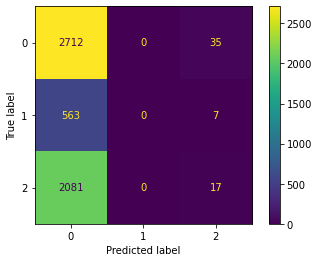

In [68]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [69]:
print(classification_report(y_test,y_pred, target_names = target_names))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.51      0.99      0.67      2747
            Single-gene inheritance diseases       0.00      0.00      0.00       570
Multifactorial genetic inheritance disorders       0.29      0.01      0.02      2098

                                    accuracy                           0.50      5415
                                   macro avg       0.26      0.33      0.23      5415
                                weighted avg       0.37      0.50      0.35      5415



C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### DecisionTreeClassifier :  This algorithm does not need data to be scaled.

In [70]:
dtc = DecisionTreeClassifier(random_state=42)
# Fit the model on the trainng data.
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

In [71]:
results = cross_val_score(dtc,X_train,y_train, cv=5)
print(results)
print(np.mean(results))

[0.41115948 0.42461417 0.42319873 0.42992874 0.40459224]
0.4186986719204562


In [72]:
#test score 
dtc.score(X_test, y_test)

0.42253000923361034

In [73]:
cm = confusion_matrix(y_test, y_pred_dtc)
cm

array([[1393,  319, 1035],
       [ 257,   92,  221],
       [1035,  260,  803]], dtype=int64)

In [74]:
print(classification_report(y_test,y_pred_dtc, target_names = target_names))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.52      0.51      0.51      2747
            Single-gene inheritance diseases       0.14      0.16      0.15       570
Multifactorial genetic inheritance disorders       0.39      0.38      0.39      2098

                                    accuracy                           0.42      5415
                                   macro avg       0.35      0.35      0.35      5415
                                weighted avg       0.43      0.42      0.43      5415



In [75]:
acc_score = accuracy_score(y_test, y_pred_dtc)
f1 = f1_score(y_test, y_pred_dtc, average='weighted')
print('DecisionTreeClassifier Accuracy : ', "%.2f" % (acc_score*100))
print('DecisionTreeClassifier F1 : ', "%.2f" % (f1*100))

DecisionTreeClassifier Accuracy :  42.25
DecisionTreeClassifier F1 :  42.55


###### RandomForestClassifier : This algorithm does not need data to be scaled.

In [76]:
#class_weight={1: 0.15, 2:0.5, 3: 1.5},random_state=42,verbose=False
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [77]:
results = cross_val_score(rfc,X_train,y_train, cv=5)
print(results)
print(np.mean(results))

[0.49267907 0.48674317 0.49287411 0.49643705 0.48733175]
0.49121303070151934


In [78]:
#test score
rfc.score(X_test, y_test)

0.4871652816251154

In [79]:
cm = confusion_matrix(y_test, y_pred_rfc)
cm

array([[2297,    0,  450],
       [ 487,    2,   81],
       [1759,    0,  339]], dtype=int64)

In [80]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.51      0.84      0.63      2747
           1       1.00      0.00      0.01       570
           2       0.39      0.16      0.23      2098

    accuracy                           0.49      5415
   macro avg       0.63      0.33      0.29      5415
weighted avg       0.51      0.49      0.41      5415



In [81]:
acc_score = accuracy_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc, average='weighted')
print('RandomForestClassifier Accuracy : ', "%.2f" % (acc_score*100))
print('RandomForestClassifier F1 : ', "%.2f" % (f1*100))

RandomForestClassifier Accuracy :  48.72
RandomForestClassifier F1 :  40.89


###### KNeighborsClassifier KNN : This algorithm Need Scaled data.

In [82]:
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))

In [83]:
print(test_scores)

[0.41902123730378577, 0.4481994459833795, 0.4424746075715605, 0.4500461680517082, 0.44986149584487534, 0.46371191135734074, 0.4587257617728532, 0.47054478301015695, 0.4662973222530009]


C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


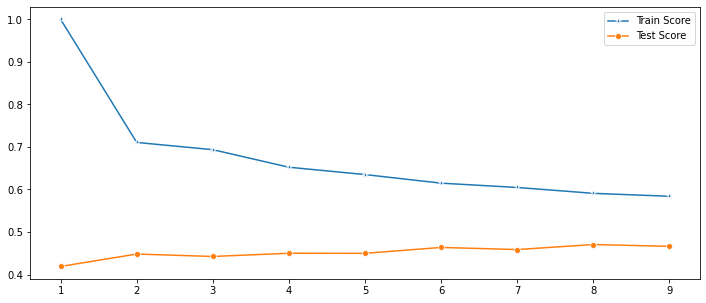

In [84]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

In [85]:
knn = KNeighborsClassifier(2)
knn.fit(X_train_scaled,y_train)
#test score
knn.score(X_test_scaled,y_test)

0.4481994459833795

In [86]:
#cv on training data only : still need discussion
results = cross_val_score(knn,X_train_scaled,y_train, cv=5)
print(results)
print(np.mean(results))

[0.46933122 0.47289276 0.46595408 0.4608076  0.46555819]
0.4669087708645285


In [87]:
y_pred_knn = knn.predict(X_test_scaled)

In [88]:
acc_score = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average='weighted')
print('KNeighborsClassifier Accuracy : ', "%.2f" % (acc_score*100))
print('KNeighborsClassifier F1 : ', "%.2f" % (f1*100))

KNeighborsClassifier Accuracy :  44.82
KNeighborsClassifier F1 :  39.73


In [89]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60      2747
           1       0.13      0.11      0.12       570
           2       0.36      0.14      0.20      2098

    accuracy                           0.45      5415
   macro avg       0.33      0.33      0.31      5415
weighted avg       0.41      0.45      0.40      5415



###### support vector machine algorithm SVC : This algorithm Need Scaled data.

In [90]:
#Radia basis Function
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1, random_state=42)
rbf.fit(X_train_scaled, y_train)
#Polynomial
poly = svm.SVC(kernel='poly', degree=3, C=1, random_state=42)
poly.fit(X_train_scaled, y_train)

SVC(C=1, kernel='poly', random_state=42)

In [91]:
results = cross_val_score(rbf,X_train_scaled,y_train, cv=5)
print(results)
print(np.mean(results))

[0.51404828 0.51404828 0.51425178 0.51425178 0.5138559 ]
0.5140912037563592


In [92]:
results = cross_val_score(poly,X_train_scaled,y_train, cv=5)
print(results)
print(np.mean(results))

[0.47605857 0.50217649 0.47347585 0.49406176 0.4722882 ]
0.4836121745794665


In [93]:
poly_pred = poly.predict(X_test_scaled)
rbf_pred = rbf.predict(X_test_scaled)

In [94]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('SVM Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('SVM F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

SVM Accuracy (Polynomial Kernel):  48.25
SVM F1 (Polynomial Kernel):  43.09


In [95]:
rbf_accuracy = accuracy_score(y_test, poly_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('SVM Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('SVM F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

SVM Accuracy (RBF Kernel):  48.25
SVM F1 (RBF Kernel):  34.15


In [96]:
print(classification_report(y_test,poly_pred))

              precision    recall  f1-score   support

           0       0.51      0.76      0.61      2747
           1       0.13      0.01      0.02       570
           2       0.40      0.25      0.31      2098

    accuracy                           0.48      5415
   macro avg       0.35      0.34      0.31      5415
weighted avg       0.43      0.48      0.43      5415



In [97]:
print(classification_report(y_test,rbf_pred, target_names=target_names))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.51      1.00      0.67      2747
            Single-gene inheritance diseases       0.00      0.00      0.00       570
Multifactorial genetic inheritance disorders       0.00      0.00      0.00      2098

                                    accuracy                           0.51      5415
                                   macro avg       0.17      0.33      0.22      5415
                                weighted avg       0.26      0.51      0.34      5415



C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### GradientBoostingClassifier

In [98]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)

In [99]:
results = cross_val_score(gbc,X_train,y_train, cv=5)
print(results)
print(np.mean(results))

[0.51048674 0.50850811 0.51187648 0.50831354 0.5       ]
0.5078369758625844


In [100]:
#test score
gbc.score(X_test, y_test)

0.5010156971375808

In [101]:
cm = confusion_matrix(y_test, y_pred_gbc)
cm

array([[2590,    0,  157],
       [ 546,    0,   24],
       [1971,    4,  123]], dtype=int64)

In [102]:
print(classification_report(y_test,y_pred_gbc, target_names=target_names))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.51      0.94      0.66      2747
            Single-gene inheritance diseases       0.00      0.00      0.00       570
Multifactorial genetic inheritance disorders       0.40      0.06      0.10      2098

                                    accuracy                           0.50      5415
                                   macro avg       0.30      0.33      0.25      5415
                                weighted avg       0.41      0.50      0.37      5415



In [103]:
acc_score = accuracy_score(y_test, y_pred_gbc)
f1 = f1_score(y_test, y_pred_gbc, average='weighted')
print('GradientBoostingClassifier Accuracy : ', "%.2f" % (acc_score*100))
print('GradientBoostingClassifier F1 : ', "%.2f" % (f1*100))

GradientBoostingClassifier Accuracy :  50.10
GradientBoostingClassifier F1 :  37.43


###### XGBClassifier

In [104]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [105]:
# fit model no training data
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# make predictions for test data
y_pred_xgb = xgb.predict(X_test)
#test score
xgb.score(X_test, y_test)

0.4759002770083102

In [106]:
results = cross_val_score(xgb,X_train, y_train, cv=5)
print(results)
print(np.mean(results))

[0.46814404 0.4887218  0.46753761 0.47268409 0.46437055]
0.4722916179058723


In [107]:
cm = confusion_matrix(y_test, y_pred_rfc)
print(cm)

[[2297    0  450]
 [ 487    2   81]
 [1759    0  339]]


In [108]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.51      0.73      0.60      2747
           1       0.13      0.01      0.03       570
           2       0.40      0.27      0.32      2098

    accuracy                           0.48      5415
   macro avg       0.35      0.34      0.32      5415
weighted avg       0.43      0.48      0.43      5415



In [109]:
acc_score = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='weighted')
print('XGBClassifier Accuracy : ', "%.2f" % (acc_score*100))
print('XGBClassifier F1 : ', "%.2f" % (f1*100))

XGBClassifier Accuracy :  47.59
XGBClassifier F1 :  43.18


###### LGBMClassifier


In [110]:
# fit model no training data
lgbmodel = lgb.LGBMClassifier(random_state=42)
lgbmodel.fit(X_train, y_train)
# make predictions for test data
y_pred_lgb = lgbmodel.predict(X_test)
#test score
lgbmodel.score(X_test, y_test)

0.4866112650046168

In [111]:
results = cross_val_score(lgbmodel,X_train, y_train, cv=5)
print(results)
print(np.mean(results))

[0.49188761 0.48793035 0.49010293 0.48416469 0.48099762]
0.48701664149121393


In [112]:
cm = confusion_matrix(y_test, y_pred_lgb)
print(cm)
print(classification_report(y_test,y_pred_lgb, target_names=target_names))

[[2312    3  432]
 [ 482    9   79]
 [1775    9  314]]
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.51      0.84      0.63      2747
            Single-gene inheritance diseases       0.43      0.02      0.03       570
Multifactorial genetic inheritance disorders       0.38      0.15      0.21      2098

                                    accuracy                           0.49      5415
                                   macro avg       0.44      0.34      0.29      5415
                                weighted avg       0.45      0.49      0.41      5415



In [113]:
acc_score = accuracy_score(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb, average='weighted')
print('LGBMClassifier Accuracy : ', "%.2f" % (acc_score*100))
print('LGBMClassifier F1 : ', "%.2f" % (f1*100))

LGBMClassifier Accuracy :  48.66
LGBMClassifier F1 :  40.71


###### Imbalance Data Handling 
Oversampling is one of the most widely used techniques to deal with imbalance classes. To briefly explain the concept, we generate synthetic samples for minority classes to make sure we have enough data to train the model

In [114]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


###### Using SMOTE

In [115]:
from imblearn.over_sampling import SMOTE
sm  = SMOTE()

In [116]:
X_train_sm, y_train_sm =  sm.fit_resample(X_train, y_train)

In [117]:
# original counts :
y.value_counts()

Mitochondrial     9241
Single_gene       6929
Multifactorial    1877
Name: Genetic_Disorder, dtype: int64

In [118]:
# counts after over_sampling
#y_train_sm.value_counts()
import numpy as np
unique, counts = np.unique(y_train_sm, return_counts=True)
dict(zip(unique, counts))

{0: 6494, 1: 6494, 2: 6494}

In [119]:
final_model = RandomForestClassifier()
#final_model = lgb.LGBMClassifier()
final_model.fit(X_train_sm, y_train_sm)
y_pred_final = final_model.predict(X_test)

In [120]:
#test score
final_model.score(X_test, y_test)

0.4781163434903047

In [121]:
acc_score = accuracy_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final, average='weighted')
print('SMOTE Accuracy : ', "%.2f" % (acc_score*100))
print('SMOTE F1 : ', "%.2f" % (f1*100))

SMOTE Accuracy :  47.81
SMOTE F1 :  42.09


In [122]:
print(classification_report(y_test,y_pred_final, target_names=target_names))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.51      0.77      0.61      2747
            Single-gene inheritance diseases       0.24      0.01      0.02       570
Multifactorial genetic inheritance disorders       0.38      0.22      0.28      2098

                                    accuracy                           0.48      5415
                                   macro avg       0.38      0.33      0.30      5415
                                weighted avg       0.43      0.48      0.42      5415



###### Using RandomOverSampler

In [123]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [124]:
# counts after over_sampling
#y_train_ros.value_counts()
unique, counts = np.unique(y_train_ros, return_counts=True)
dict(zip(unique, counts))

{0: 6494, 1: 6494, 2: 6494}

In [125]:
final_model2 = RandomForestClassifier()
final_model2.fit(X_train_ros, y_train_ros)
y_pred_final2 = final_model2.predict(X_test)
#test score
final_model2.score(X_test, y_test)

0.47977839335180056

In [126]:
acc_score = accuracy_score(y_test, y_pred_final2)
f1 = f1_score(y_test, y_pred_final2, average='weighted')
print('RandomOverSampler Accuracy : ', "%.2f" % (acc_score*100))
print('RandomOverSampler F1 : ', "%.2f" % (f1*100))

RandomOverSampler Accuracy :  47.98
RandomOverSampler F1 :  43.07


###### Using RandomUnderSampler

In [127]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [128]:
# counts after over_sampling
#y_train_ros.value_counts()
unique, counts = np.unique(y_train_rus, return_counts=True)
dict(zip(unique, counts))

{0: 1307, 1: 1307, 2: 1307}

In [129]:
final_model3 = RandomForestClassifier()
final_model3.fit(X_train_rus, y_train_rus)
y_pred_final3 = final_model3.predict(X_test)
#test score
final_model3.score(X_test, y_test)

0.34699907663896584

In [130]:
acc_score = accuracy_score(y_test, y_pred_final3)
f1 = f1_score(y_test, y_pred_final3, average='weighted')
print('RandomUnderSampler Accuracy : ', "%.2f" % (acc_score*100))
print ('RandomUnderSampler F1 : ', "%.2f" % (f1*100))

RandomUnderSampler Accuracy :  34.70
RandomUnderSampler F1 :  36.64


###### Using class_weight 

In [131]:
final_model4 = RandomForestClassifier(random_state=42, class_weight ='balanced')
final_model4.fit(X_train_sm, y_train_sm)
y_pred_final4 = final_model4.predict(X_test)
#test score
final_model4.score(X_test, y_test)

0.4842105263157895

In [132]:
acc_score = accuracy_score(y_test, y_pred_final4)
f1 = f1_score(y_test, y_pred_final4, average='weighted')
print('Random Forest classifier with class_weight and SMOTE Accuracy : ', "%.2f" % (acc_score*100))
print('Random Forest classifier with class_weight and SMOTE  F1 : ', "%.2f" % (f1*100))

Random Forest classifier with class_weight and SMOTE Accuracy :  48.42
Random Forest classifier with class_weight and SMOTE  F1 :  42.65


In [133]:
print(classification_report(y_test,y_pred_final4, target_names=target_names))

                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.51      0.78      0.62      2747
            Single-gene inheritance diseases       0.23      0.01      0.02       570
Multifactorial genetic inheritance disorders       0.40      0.23      0.29      2098

                                    accuracy                           0.48      5415
                                   macro avg       0.38      0.34      0.31      5415
                                weighted avg       0.44      0.48      0.43      5415



##### Hyper Tunning

###### GridSearchCV

In [134]:


from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc = RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator = rfc,param_grid=param_grid,cv=5)
CV_rfc.fit(X_train_sm, y_train_sm)
print("Best Score:" + str(CV_rfc.best_score_))
print("Best Parameters: " + str(CV_rfc.best_params_))

#Best Score:0.5144870239105703
#Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}

Best Score:0.5760271946145064
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [135]:
model = RandomForestClassifier(random_state=42, criterion= 'entropy', max_depth=8, max_features='auto', n_estimators= 200,class_weight ='balanced')
model.fit(X_train_sm, y_train_sm)
y_pred = model.predict(X_test)
#test score
model.score(X_test, y_test)

0.49473684210526314

In [136]:
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Random Forest classifier+SMOTE+Class_weight+GridSearchCV accuracy : ', "%.2f" % (acc_score*100))
print('Random Forest classifier+SMOTE+Class_weight+GridSearchCV F1 : ', "%.2f" % (f1*100))

Random Forest classifier+SMOTE+Class_weight+GridSearchCV accuracy :  49.47
Random Forest classifier+SMOTE+Class_weight+GridSearchCV F1 :  35.82


###### RandomizedSearchCV

In [137]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] #
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth
               }
# need to read about the algo
print(random_grid)
#{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 
#'max_features': ['auto', 'sqrt'], 
#'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 
#'min_samples_split': [2, 5, 10], 
#'min_samples_leaf': [1, 2, 4], 
#'bootstrap': [True, False]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}


In [138]:
rfc = RandomForestClassifier(random_state=42)
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rfc_random.fit(X_train_sm, y_train_sm)
print("RandomizedSearchCV Best Score:" + str(rfc_random.best_score_))
print("RandomizedSearchCV Best Parameters: " + str(rfc_random.best_params_))

#Fitting 5 folds for each of 100 candidates, totalling 500 fits
# started at 10:30amPST ended at 12:35pm PST
#RandomizedSearchCV Best Score:0.5969189694173215
#RandomizedSearchCV Best Parameters: {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}
    

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomizedSearchCV Best Score:0.593068879920794
RandomizedSearchCV Best Parameters: {'n_estimators': 400, 'max_features': 'auto', 'max_depth': 110}


In [139]:
model = RandomForestClassifier(random_state=42, class_weight ='balanced', n_estimators=1800, min_samples_split= 2, min_samples_leaf=1, max_features='auto', max_depth=20, bootstrap=False)
model.fit(X_train_sm, y_train_sm)
y_pred = model.predict(X_test)
#test score
model.score(X_test, y_test)

0.4904893813481071

In [140]:
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Random Forest classifier+SMOTE+Class_weight+RandomizedSearchCV  accuracy : ', "%.2f" % (acc_score*100))
print('Random Forest classifier+SMOTE+Class_weight+RandomizedSearchCV  F1 : ', "%.2f" % (f1*100))

Random Forest classifier+SMOTE+Class_weight+RandomizedSearchCV  accuracy :  49.05
Random Forest classifier+SMOTE+Class_weight+RandomizedSearchCV  F1 :  41.63


###### feature_importance

30


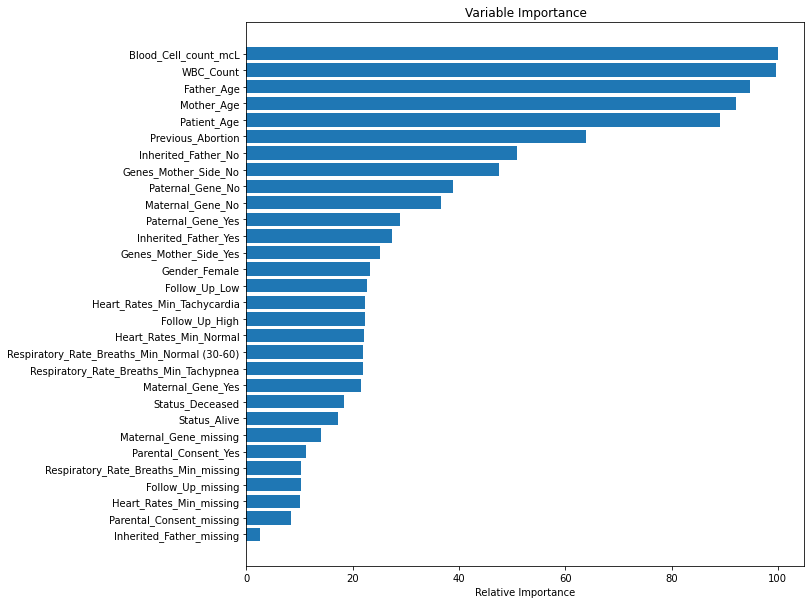

In [141]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Summary: 
The dataset is too small and also with lost of missing values.
After handling the missing values, we applied different models. 
RandomForestClassifier Accuracy :  48.72
RandomForestClassifier F1 :  40.89
Random Forest classifier showed better performance. 

Above graph shows, almost all of the features are highly correlated with each other and are important. 

As the dataset is imbalanced, using SMOTE Oversampling and handling the Class_weight, helped to improve the score. 
Using RandomizedSearchCV, the hyperparameters are selected, 
using which the accuracy increased to 49.18 with F1 score :  41.69